# **Dataset Generation**

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [10]:
def generate_dataset(num_samples):
    X = np.zeros((num_samples, 50, 50), dtype=np.float32)
    y = np.zeros((num_samples, 2), dtype=np.float32)
    for i in range(num_samples):
        x_coord = np.random.randint(0, 50)
        y_coord = np.random.randint(0, 50)
        X[i, x_coord, y_coord] = 255
        y[i] = [x_coord, y_coord]
    return X, y


num_samples = 10000
X, y = generate_dataset(num_samples)

# Split into training and test sets
split = int(0.8 * num_samples)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshape for the CNN
X_train = X_train.reshape(-1, 50, 50, 1)
X_test = X_test.reshape(-1, 50, 50, 1)


# **CNN Model Creation**

In [11]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(2)  # Output layer for coordinates
])

# Compile the model
model.compile(optimizer=Adam(), loss='mse')

# Print the model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 24, 24, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 11, 11, 64)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 7744)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

# **Model Training**

In [12]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32)

Epoch 1/10
200/200 [==============================] - 20s 95ms/step - loss: 44.4205 - val_loss: 3.8825
Epoch 2/10
200/200 [==============================] - 19s 95ms/step - loss: 2.3354 - val_loss: 1.2646
Epoch 3/10
200/200 [==============================] - 18s 91ms/step - loss: 1.3887 - val_loss: 1.4730
Epoch 4/10
200/200 [==============================] - 18s 88ms/step - loss: 1.0537 - val_loss: 0.6749
Epoch 5/10
200/200 [==============================] - 21s 107ms/step - loss: 0.7123 - val_loss: 0.7425
Epoch 6/10
200/200 [==============================] - 18s 88ms/step - loss: 0.7003 - val_loss: 0.4415
Epoch 7/10
200/200 [==============================] - 17s 87ms/step - loss: 0.3859 - val_loss: 0.3405
Epoch 8/10
200/200 [==============================] - 21s 106ms/step - loss: 0.7931 - val_loss: 0.8038
Epoch 9/10
200/200 [==============================] - 18s 89ms/step - loss: 0.7613 - val_loss: 1.1351
Epoch 10/10
200/200 [==============================] - 19s 94ms/step - loss: 0.

# **Model Evaluation and Visualization**

63/63 [==============================] - 1s 21ms/step - loss: 0.3472
Test Loss: 0.3471718430519104


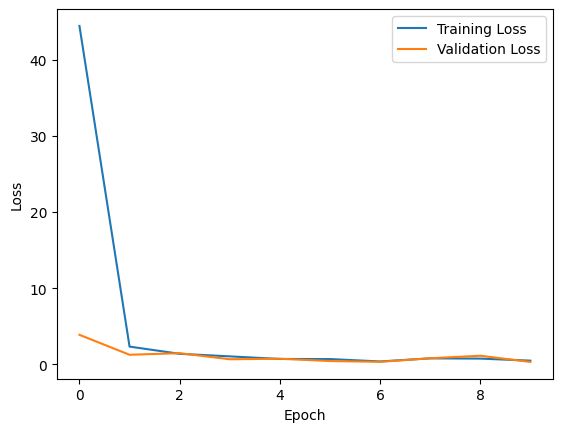

1/1 [==============================] - 0s 22ms/step
Predicted Coordinates: [[29.925518 19.797691]]


In [20]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Visualize training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Example prediction
example = np.zeros((1, 50, 50, 1), dtype=np.float32)
example[0, 30, 20, 0] = 255  # Example image with coordinates
predicted_coords = model.predict(example)
print(f'Predicted Coordinates: {predicted_coords}')



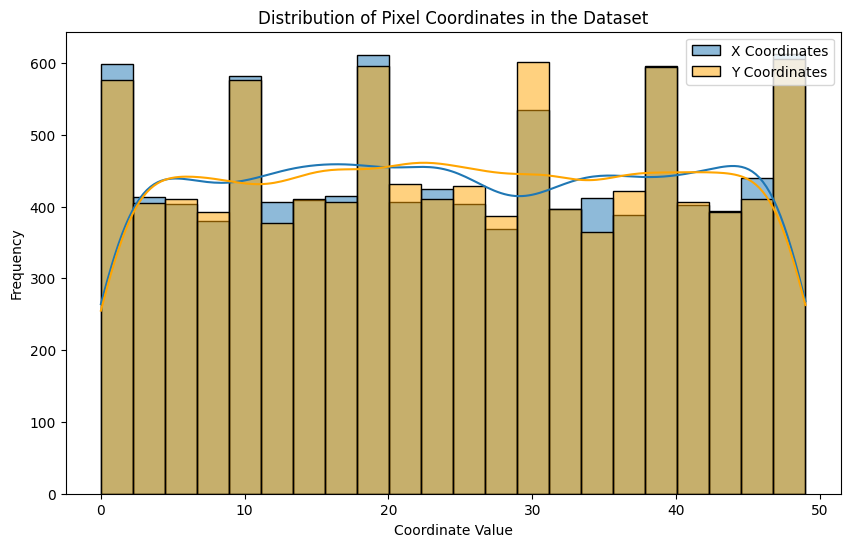

In [15]:
# Visualizing the Distribution of Pixel Coordinates in the Dataset
x_coords = y[:, 0]
y_coords = y[:, 1]

plt.figure(figsize=(10, 6))
sns.histplot(x_coords, kde=True, label='X Coordinates')
sns.histplot(y_coords, kde=True, color='orange', label='Y Coordinates')
plt.legend()
plt.title('Distribution of Pixel Coordinates in the Dataset')
plt.xlabel('Coordinate Value')
plt.ylabel('Frequency')
plt.show()


63/63 [==============================] - 2s 39ms/step


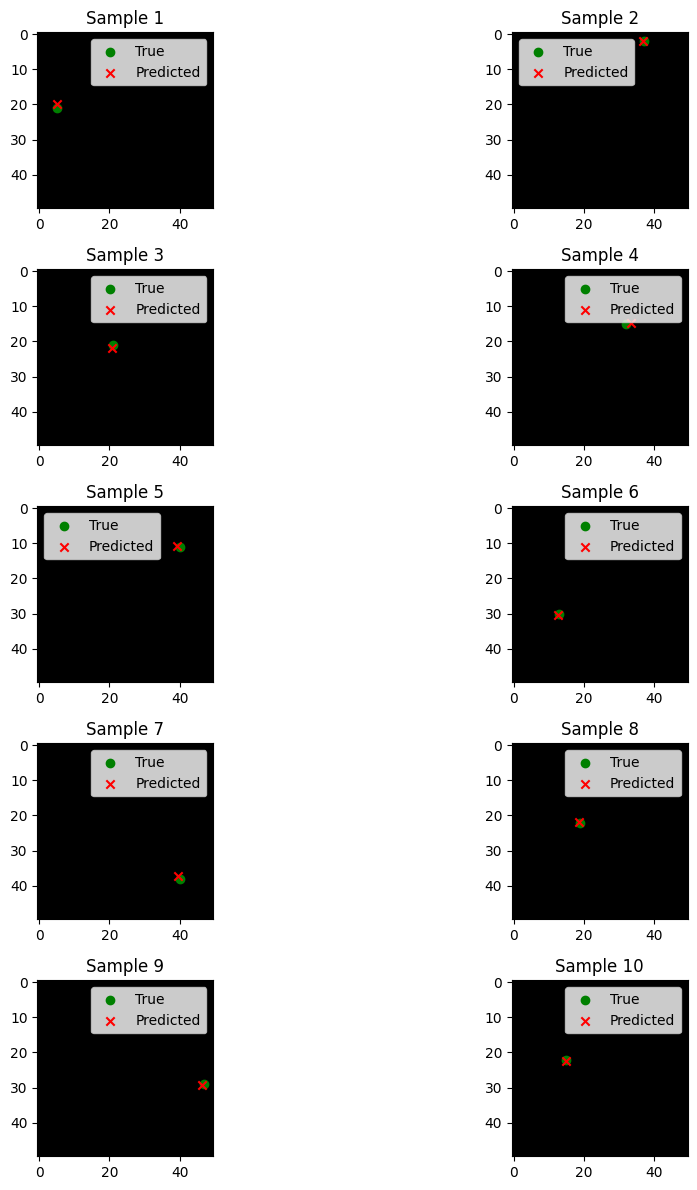

In [16]:
# Predict coordinates for the test set
predictions = model.predict(X_test)

# Plot true vs predicted coordinates for a subset of test samples
num_samples_to_plot = 10
plt.figure(figsize=(12, 12))

for i in range(num_samples_to_plot):
    plt.subplot(5, 2, i+1)
    plt.imshow(X_test[i, :, :, 0], cmap='gray')
    plt.scatter(y_test[i, 1], y_test[i, 0], color='green', marker='o', label='True')
    plt.scatter(predictions[i, 1], predictions[i, 0], color='red', marker='x', label='Predicted')
    plt.legend()
    plt.title(f'Sample {i+1}')

plt.tight_layout()
plt.show()


# **Summary:**

Dataset Generation:


*   Generates 10,000 samples of 50x50 grayscale images with one pixel set to 255.
*   Splits the dataset into training (80%) and testing (20%) sets.

CNN Model Creation:

*   Defines a simple CNN architecture with two convolutional layers, followed by max-pooling and dense layers.
*  Compiles the model using Mean Squared Error (MSE) loss and Adam optimizer.

Model Training:

*   Trains the model for 10 epochs with a validation split of 20% of the training data.


Model Evaluation and Visualization:


*   Evaluates the model on the test set and prints the loss.
*   Plots the training and validation loss over epochs.

*   Predicts the coordinates for an example image and visualizes the predicted coordinates on the image.





